# Teorema del Límite Central

### La distribución normal (Gaussiana)

La distribución **normal** o **gaussiana** ocupa un lugar especial en la estadística gracias al **teorema del límite central**.

Carl Freidrich Gauss la dedujo cuando un astrónomo le pidió ayuda para localizar un nuevo planeta (que había perdido).  Gauss empezó por modelar los errores de medición astronómicos y procedió a derivarlo.[source](https://www.math.utah.edu/~kenkel/normaldistributiontalk.pdf)

La notación tradicional para una variable aleatoria normal es $Z$ (en lugar de $X$, utilizada para casi cualquier otra variable aleatoria).

Una variable aleatoria normal $Z$ tiene como función de distribución acumulada:

$$ \Phi (t) = \frac{1}{\sqrt{2 \sigma^2 \pi}} \int_{- \infty}^t e^{ - \frac{(x - \mu)^2}{2 \sigma^2} } dx $$

$\Phi$ es la notación tradicional para la función de distribución acumulada de una variable aleatoria normal.

La función de densidad de una variable aleatoria normal es:

$$ \phi (t) = \frac{1}{\sqrt{2 \sigma^2 \pi}} e^{ - \frac{(x - \mu)^2}{2 \sigma^2} } $$

En la práctica, la única forma de calcular los valores de la función de distribución de una variable aleatoria normal es de forma numérica utilizando un ordenador.

### Parámetros de una Distribución Normal

La $\mu$ (media) y $\sigma$ (desviación estándar) son parámetros de una distribución normal.

Al cambiar $\mu$ la distribución de desplaza de izquierda a derecha.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

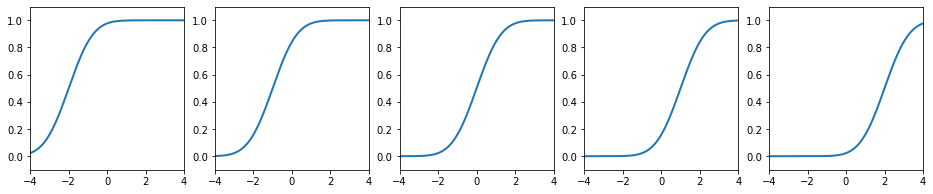

In [2]:
normal_dists_varying_mean = [
    stats.norm(mu, 1) for mu in [-2, -1, 0, 1, 2]
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_mean[i].cdf(x), linewidth=2)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-4, 4)

Al cambiar $\sigma$ la distribución se estira o se acorta horizontalmente

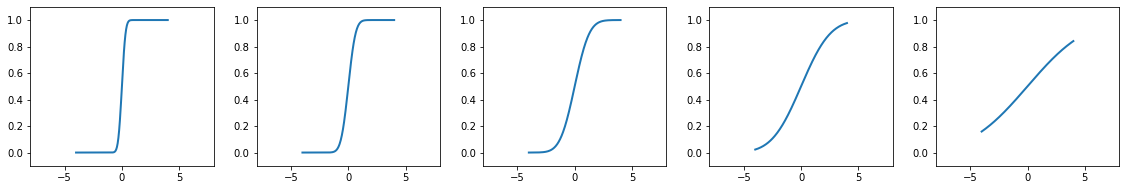

In [3]:
normal_dists_varying_sigma = [
    stats.norm(0, sigma) for sigma in [0.25, 0.5, 1, 2, 4]
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_sigma[i].cdf(x), linewidth=2)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-8, 8)
    
plt.tight_layout(pad=2)

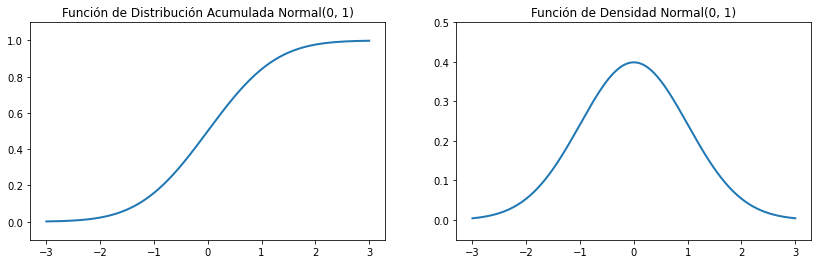

In [4]:
normal = stats.norm(0, 1)

x = np.linspace(-3, 3, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, normal.cdf(x), linewidth=2)
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_title("Función de Distribución Acumulada Normal(0, 1)")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_ylim(-0.05, 0.5)
ax[1].set_title("Función de Densidad Normal(0, 1)");

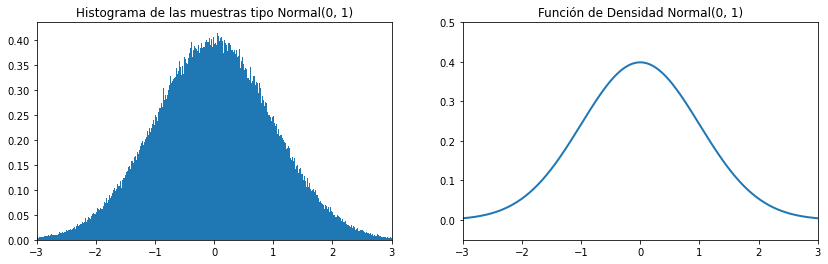

In [5]:
normal_samples = normal.rvs(500000) # muestra aleatoria

x = np.linspace(-3, 3, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4)) # 2 axes: 0, 1

# axes 0
ax[0].hist(normal_samples, bins = 1000, density = True)
ax[0].set_xlim(-3, 3)
#ax[0].set_ylim(-0.05, 0.5) #  use if density=True
ax[0].set_title("Histograma de las muestras tipo Normal(0, 1)")

# axes 1
ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-0.05, 0.5)
ax[1].set_title("Función de Densidad Normal(0, 1)");

## Teorema del Límite Central

### Distribución de las medias muestrales

Consideremos una población fija, y por el momento, supongamos que tenemos el poder de muestrear libremente, tantos puntos de datos como queramos

In [6]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])

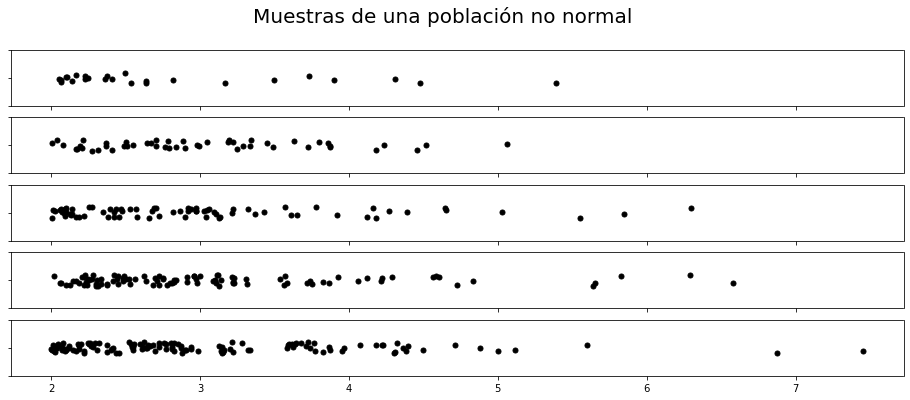

In [7]:
fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

population = stats.expon(2)

sample_sizes = [25, 50, 75, 100, 125]
for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.rvs(sample_size)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    
_ = fig.suptitle("Muestras de una población no normal", fontsize=20)

Al fijar un tamaño de muestra (Por ejemplo, 50), y muestrear repetidamente la población con ese tamaño fijo

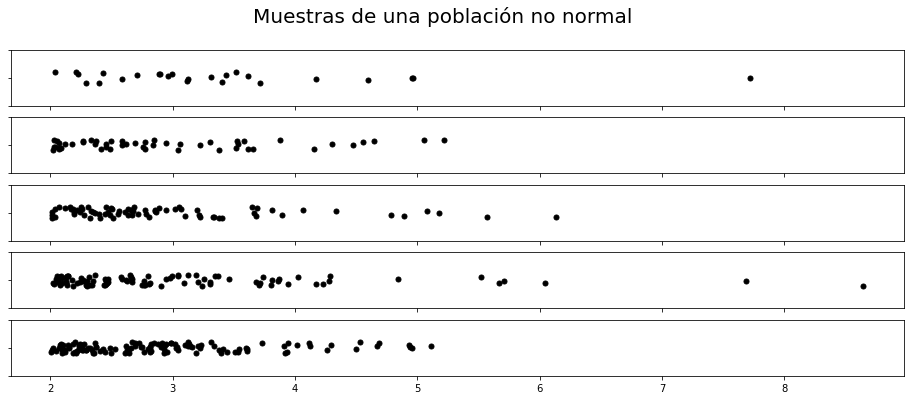

In [8]:
sample_size = 50

fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.rvs(sample_size)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    
_ = fig.suptitle("Muestras de una población no normal", fontsize=20)

La **distribución muestral de la media** es la distribución de las medias calculadas a partir de estas *muestras diferentes*.

In [9]:
axs.flatten()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

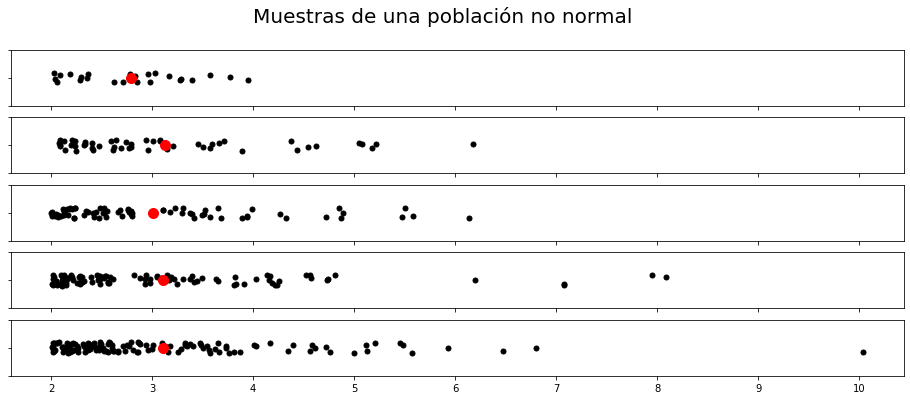

In [10]:
fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)
for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.rvs(sample_size)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax.scatter(sample.mean(), 0, color='red', s=100)
    
_ = fig.suptitle("Muestras de una población no normal", 
                 fontsize=20)

Al tomar muestras repetidamente, y calcular las medias de las muestras es posible trazar la distribución de estas medias.

Cada uno de los puntos rojos de la visualización anterior se cuenta **una vez** en el histograma siguiente.

In [11]:
def sample_from_repeated_sum(n_samples, n_summands, sampler):
    """Sample n_samples from the sum of n_summands iid copies of a random
    varaible.
    """
    samples = sampler.rvs(n_samples*n_summands).reshape(n_samples, n_summands)
    return np.sum(samples, axis=1)

def sample_means_from_population(n_samples, n_summands, sampler): 
    return (1.0/n_summands) * sample_from_repeated_sum(n_samples, n_summands, sampler)

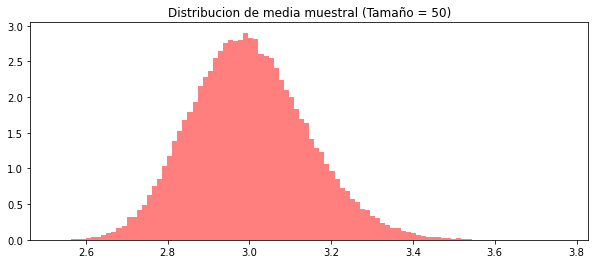

In [12]:
sample_means = sample_means_from_population(
    n_samples=100000, n_summands=50, sampler=population)

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(sample_means, bins=100, density=True, color="red", alpha=0.5)
# TODO check y-axis
_ = ax.set_title("Distribucion de media muestral (Tamaño = 50)")

Se ha reducido en gran medida la inclinación hacia la derecha de nuestra distribución original. Nuestro proceso ha suavizado y simetrizado la distribución original.

El siguiente paso es superponer una distribución normal con la media y la varianza correctas.

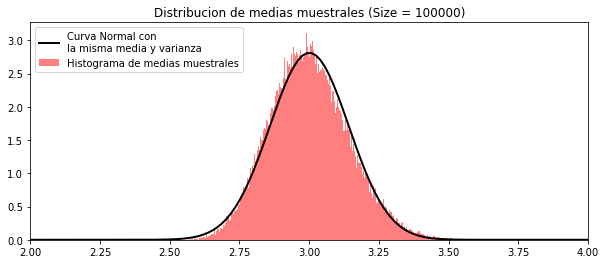

In [13]:
mean_sample_means = np.mean(sample_means)
std_sample_means = np.std(sample_means)

# Pay attention to the arguments
sample_means_model = stats.norm(mean_sample_means, 
                                std_sample_means)

fig, ax = plt.subplots(1, figsize=(10, 4))
ax.hist(sample_means, bins=500, density=True, color="red", alpha=0.5,
            label="Histograma de medias muestrales")
x = np.linspace(1, 5, num=250)
ax.plot(x, sample_means_model.pdf(x), linewidth=2, color="black", 
        label="Curva Normal con \nla misma media y varianza")
ax.set_title("Distribucion de medias muestrales (Size = 100000)")
ax.legend(loc='upper left');
ax.set_xlim(2, 4);

### Teorema del Límite Central

El **teorema del límite central** afirma que, a medida que tomamos la media de muestras cada vez **más grandes**, la distribución de las medias muestrales se vuelve cada vez **más normal**.

Es decir, las afirmaciones probabilísticas sobre la media de una muestra grande pueden aproximarse bien suponiendo que la distribución de las medias muestrales es una distribución normal con la media y la varianza correctas.

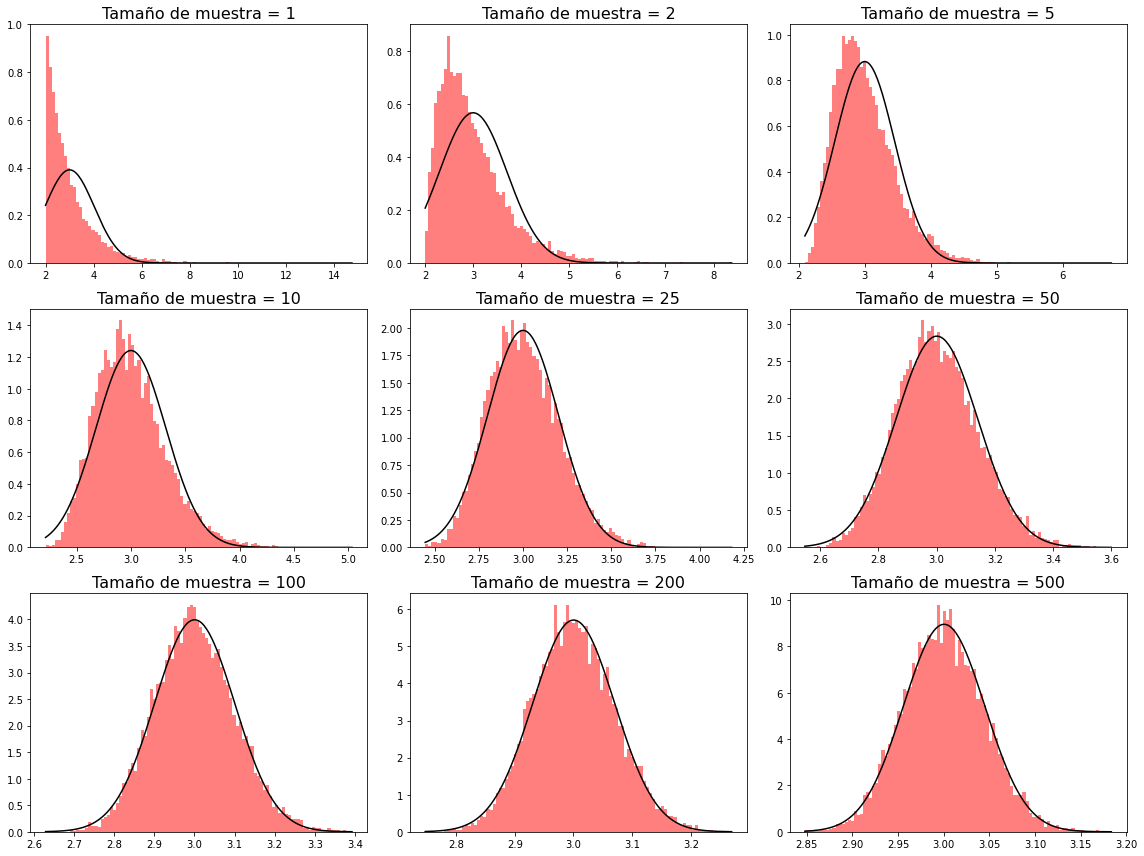

In [14]:
# running 10,000 simulations, and mean is based on varying
# 1. the #simulation are the same (number of simulations )
# 1. for each round of simulation, the sample size is different

# size of sample
size_of_sample = [1, 2, 5, 10, 25, 50, 100, 200, 500]

fig, axs = plt.subplots(3, 3, figsize=(16, 12))

for sample_size, ax in zip(size_of_sample, axs.flatten()):
    sample_means = sample_means_from_population(
        n_samples=10000, n_summands=sample_size, sampler=population)
    variance_sample_means = np.var(sample_means)
    sample_means_model = stats.norm(mean_sample_means, 
                                    np.sqrt(variance_sample_means))
    ax.hist(sample_means, bins=100, density=True, color="red", alpha=0.5)
    t = np.linspace(min(sample_means), max(sample_means), num=250)
    ax.plot(t, sample_means_model.pdf(t), color="black")
    _ = ax.set_title("Tamaño de muestra = {}".format(sample_size), fontsize=16)
fig.tight_layout()

  - El teorema del límite central no hace casi ninguna suposición sobre $X$. 
  
  - $X$ puede ser cualquier cosa, y sus medias muestrales siempre tenderán a ser normales.
  
**El teorema del límite central nos permite hacer afirmaciones probabilísticas sobre la media muestral de cualquier población utilizando la distribución normal.**

### Ejemplo: Distribución Binomial

Consoderando una distribución Binomial $Binom(n, p)$, que asigna probabilidades al número de caras mostradas en $n$ lanzamientos de una moneda donde la probabilidad de ver una cara en un **solo lanzamiento** es $p$.

Consideremos una variable $X$ que se distribuye a manera binomial

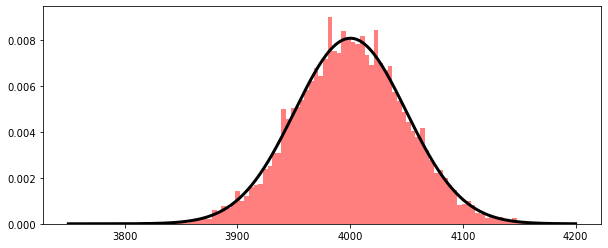

In [15]:
binomial = stats.binom(10000, 0.4)
binomial_sample = binomial.rvs(10000)

binomial_sample_mean = np.mean(binomial_sample)
binomial_sample_variance = np.var(binomial_sample)
normal_approx = stats.norm(
    binomial_sample_mean, np.sqrt(binomial_sample_variance))

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(binomial_sample, bins=100, density=True, color="red", alpha=0.5)
x = np.linspace(3750, 4200, num=250)
ax.plot(x, normal_approx.pdf(x), linewidth=3, color="black");

**Las probabilidades binomiales con un gran número de $n$ se pueden aproximar bien utilizando la distribución normal.**

Cuando se trata de una **media muestral**, el teorema del límite central nos permite derivar la **distribución real de la media muestral**.  Esto nos permite calcular las probabilidades sobre la media muestral.

Vamos a hacer un buen uso de esto cuando diseñemos pruebas de hipótesis estadísticas.

### Ejemplo: Intervalo de confianza basado en en Teorema del Límite Central para la media de la muestra

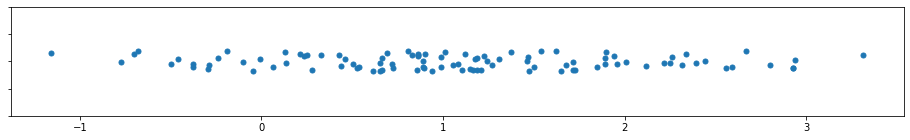

In [16]:
data = stats.norm(0.9, 1.0).rvs(100)

fig, ax = plt.subplots(1, figsize=(16, 2))
one_dim_scatterplot(data, ax, s=25)

  - La media de la muestra es una aproximación a la media de la población: el valor esperado de la media de la muestra *es* la media de la población.
  - La media de la muestra tiene una distribución aproximadamente normal, la media y la varianza de esta distribución normal pueden calcularse en términos de la media y la varianza de la población y del tamaño de la muestra.
  
Recordemos que:
  - $\mu$ es la media de la población.
  - $\sigma^2$ es la varianza de la población.
  - $\bar x$ es la **media de la muestra**.
  
Entonces podemos resumir todo esto como

$$ \bar x \sim N \left( \mu, \frac{\sigma}{\sqrt{n}} \right) $$  

Donde $$ \frac{\sigma}{\sqrt{n}} $$ es el [error estándar.](https://en.wikipedia.org/wiki/Standard_error)  
<br>

Si restamos la media poblacional de ambos lados obtenemos

$$ \bar x - \mu \sim N \left( 0, \frac{\sigma}{\sqrt{n}} \right) $$

Lo que nos permite hacer afirmaciones probabilísticas sobre lo lejos que está la media de la muestra de la media de la población.

Un **intervalo de confianza** es la respuesta a una pregunta como ésta

> ¿Qué distancia debo recorrer a la izquierda y a la derecha de la media muestral para que el 95% de las veces (es decir, en el 95% de las muestras posibles) haya encerrado la media poblacional?

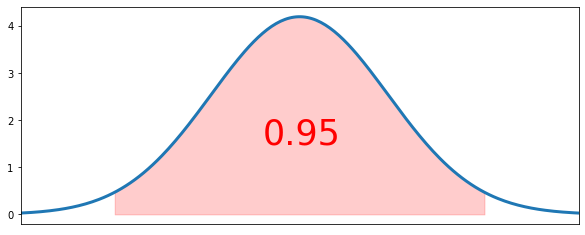

In [17]:
sample_mean = np.mean(data)
sample_varaince = np.var(data)
distribution_of_sample_minus_population_mean = stats.norm(0, np.sqrt(sample_varaince / len(data)))

fig, ax = plt.subplots(1, figsize=(10, 4))
x = np.linspace(-0.3, 0.3, num=250)
pdf = distribution_of_sample_minus_population_mean.pdf(x)
ax.plot(x, pdf, linewidth=3)

# Shade under curve
# Note: The 0.2 here is just for illustration, it does not correspond to
#       any particular value of alpha.

ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (-0.2 <= x) * (x <= 0.2) ), color="red", alpha=0.2)
ax.text(-0.04, 1.5, "0.95", fontsize=35, color="red")
ax.set_xticks([]);

La región sombreada es el área bajo la curva entre $-\alpha$ y $\alpha$. Queremos que la **región sombreada** represente $0.95$ del área total.

Esto significa que cada *mitad* de la zona sombreada a la *izquierda y a la derecha* de cero debe representar $0.475$ del área total.

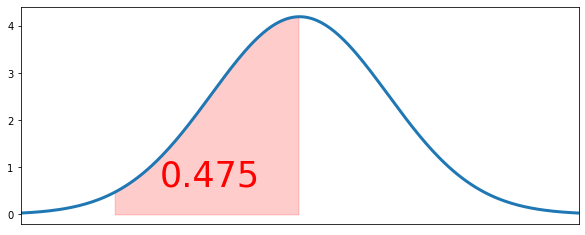

In [19]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (-0.2 <= x) * (x <= 0.0) ), color="red", alpha=0.2)
ax.text(-0.15, 0.6, "0.475", fontsize=35, color="red")
ax.set_xticks([]);

Lo que significa que la cola izquierda de $\alpha$ debería mostrar $0.5 - 0.475 = 0.025$ del área total

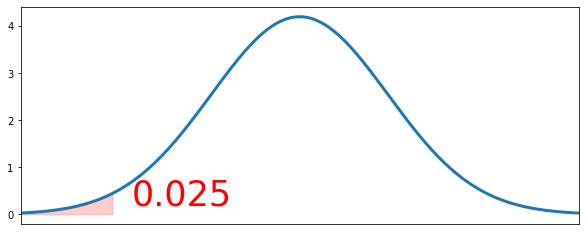

In [20]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (x <= -0.2) ), color="red", alpha=0.2)
ax.text(-0.18, 0.2, "0.025", fontsize=35, color="red")
ax.set_xticks([]);

Es **este tipo de área el que se calcula mediante la función de distribución**.

Así, si denotamos por $F$ la **función de distribución de** $ N \left( 0, \frac{\sigma}{\sqrt{n}} \right) $, encontraremos el valor de $\alpha$

$$ F(-\alpha) = 0.025 $$

O $$F^{-1}(0.025) = -\alpha$$

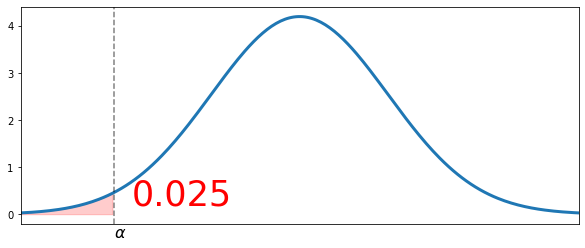

In [21]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (x <= -0.2) ), color="red", alpha=0.2)
ax.text(-0.18, 0.2, "0.025", fontsize=35, color="red")
ax.axvline(x=-0.2, ymin=0.0, ymax=100, color="black", 
           linestyle='--', alpha=0.5)
ax.text(-0.2, -0.5, r"$\alpha$", fontsize=16)
_ = ax.set_xticks([]);

El **inverso** de la función de distribución también es conocido como **función percentil**

In [22]:
alpha = distribution_of_sample_minus_population_mean.ppf(0.025)
print("Media muestral: {:2.2}".format(sample_mean))
print("Intervalo de confianza de 95% para la media muestral: [{:2.2}, {:2.2}]".format(
    sample_mean + alpha, sample_mean - alpha)
    )

Media muestral: 1.1
Intervalo de confianza de 95% para la media muestral: [0.88, 1.2]


Anteriormente llegamos a la conclusión de que

> Si extraemos muestras de la población y calculamos este intervalo de confianza muchas, muchas veces, entonces el intervalo calculado debería envolver el verdadero parámetro de la población aproximadamente el 95% de las veces.

Comprobemos esto:

In [23]:
def compute_confidence_interval(data, confidence_width):
    sample_mean = np.mean(data)
    sample_varaince = np.var(data)
    distribution_of_sample_minus_population_mean = stats.norm(0, np.sqrt(sample_varaince / len(data)))
    alpha = distribution_of_sample_minus_population_mean.ppf(0.5 - 
                                                            (confidence_width / 2.0))
    # Alpha is negative
    return sample_mean + alpha, sample_mean - alpha

In [24]:
population_mean_is_in_interval = []
for i in range(1000):
    new_data = stats.norm(0.1, 0.1).rvs(100)
    left_endpoint, right_endpoint = compute_confidence_interval(new_data, 0.95)
    population_mean_is_in_interval.append(left_endpoint <= 0.1 <= right_endpoint)
    
print("Proporcion de intervalos de confianza con el parámetro verdadero: {:2.2f}".format(
        np.mean(population_mean_is_in_interval)))

Proporcion de intervalos de confianza con el parámetro verdadero: 0.94


Podemos trazar todos los intervalos de confianza junto con el parámetro verdadero, y ver visualmente cuáles contienen el parámetro y cuáles no.

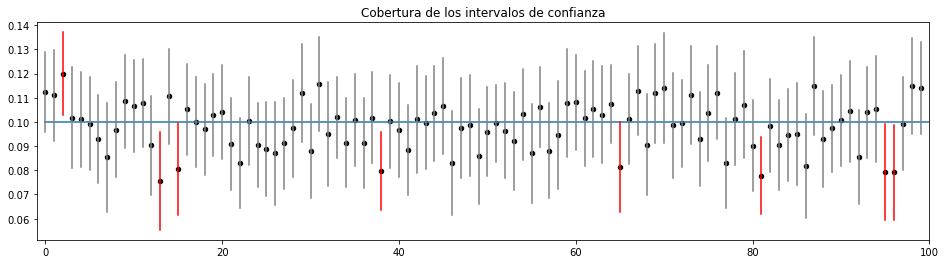

In [25]:
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.plot([0, 100], [0.1, 0.1])

for i in range(100):
    new_data = stats.norm(0.1, 0.1).rvs(100)
    sample_mean = new_data.mean()
    left_endpoint, right_endpoint = compute_confidence_interval(new_data, 0.95)
    color = "grey" if (left_endpoint <= 0.1 <= right_endpoint) else "red"
    ax.plot([i, i], [left_endpoint, right_endpoint], color=color)
    ax.scatter([i], [sample_mean], c="black", s=20)
    ax.set_xlim(-1, 100)
    
ax.set_title("Cobertura de los intervalos de confianza");